<font style = 'color:green; font-size:30px; font-weight: bold'>Classification</font>

<font color= 'grey' style='font-size: 30px'>1.2 Importing libraries and Reading data</font>
<hr style = 'border: 2px solid grey'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv"
data = pd.read_csv(uri)
data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
data.shape

(7043, 18)

<font color= 'grey' style='font-size: 30px'>1.3 Setting Project and data</font>
<hr style = 'border: 2px solid grey'>

In [4]:
pd.set_option('display.max_columns', None)

## Modifying data 

### manual mode

In [5]:
translation = {'Sim': 1, 'Nao': 0}
    
modified_data = data[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(translation)

modified_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


### automated mode

In [6]:
dummy_data = pd.get_dummies(
    data.drop(
        ['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], 
        axis = 1
    )
)
final_data = pd.concat([modified_data, dummy_data], axis = 1)
final_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [7]:
final_data.shape

(7043, 39)

## balanced data

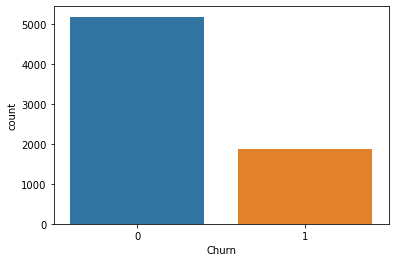

In [8]:
ax = sns.countplot(x = final_data['Churn'])

In [9]:
!pip install -U imbalanced-learn

In [10]:
X = final_data.drop('Churn', axis = 1)
y = final_data['Churn']

### Using Smote

In [11]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123) 
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [12]:
final_data = pd.concat([X, y], axis = 1)

final_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [13]:
final_data.shape

(10348, 39)

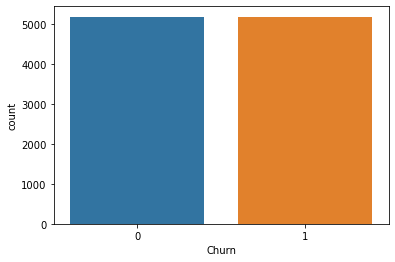

In [14]:
ax = sns.countplot(x = final_data['Churn'])
ax;

<font color= 'grey' style='font-size: 30px'>1.4 Model k-nearest neighbors - KNN</font>
<hr style = 'border: 2px solid grey'>

In [38]:
X = final_data.drop('Churn', axis = 1)
y = final_data['Churn']

In [39]:
from sklearn.preprocessing import StandardScaler 

norm = StandardScaler()
normalized_X = norm.fit_transform(X)
normalized_X

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ]])

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3, random_state=123)

## Building model

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')

knn.fit(X_train, y_train)

knn_predicted = knn.predict(X_test)
knn_predicted

array([1, 0, 0, ..., 0, 1, 1])